In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
sns.set()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data

In [5]:
# reading inputs

politifact = pd.read_csv("/content/drive/MyDrive/paper-projects/hate-fake-online-asonam/politifact.csv")
gossipcop = pd.read_csv("/content/drive/MyDrive/paper-projects/hate-fake-online-asonam/gossipcop.csv")

In [8]:
features = ['toxicity', 'severe_toxicity', 'insult', 'profanity', 'threat', 'inflammatory', 'identity_attack']

# Characterization

In [13]:
def hists(df,feature_list):
  df = df[df["toxicity"] != -1]
  df_fake = df[df["label"]=="fake"]
  df_real = df[df["label"]=="real"]

  for f in feature_list:
    df_fake[f].hist(alpha=0.5)
    df_real[f].hist(alpha=0.5)
    plt.title(f)
    plt.show()

## Politifact

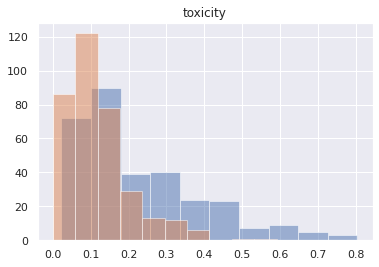

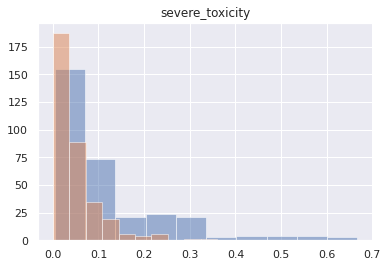

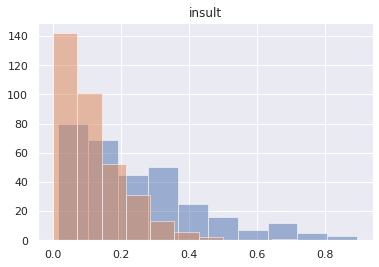

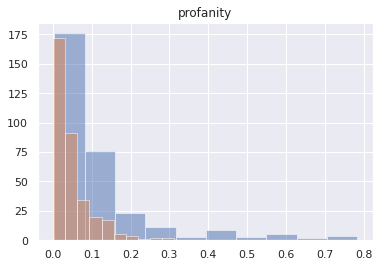

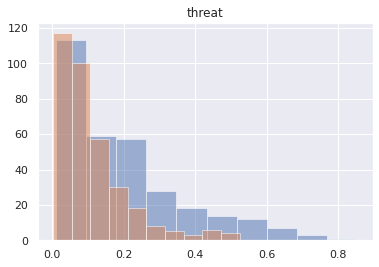

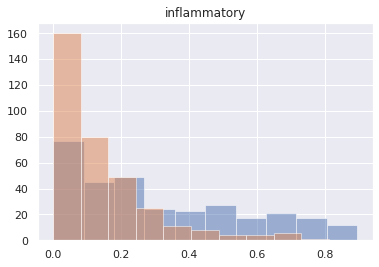

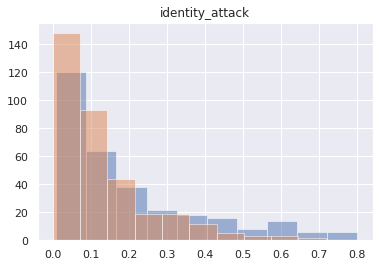

In [14]:
hists(politifact,features)

## GossipCop

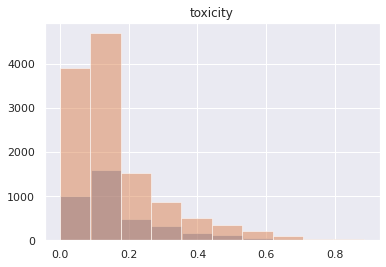

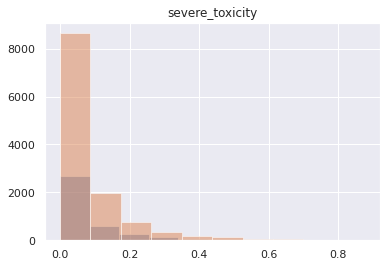

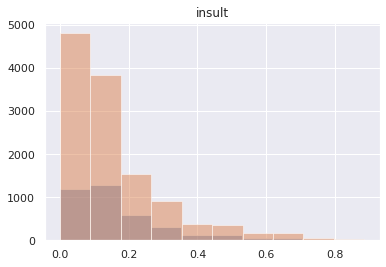

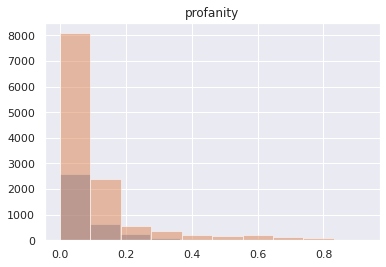

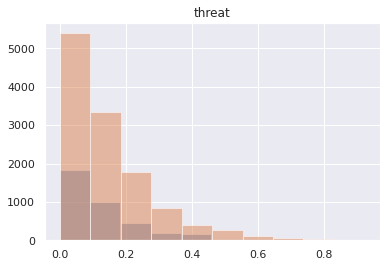

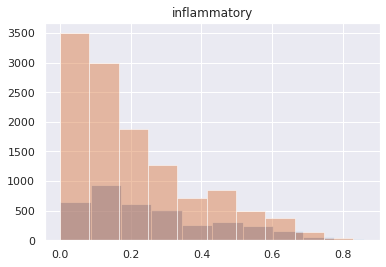

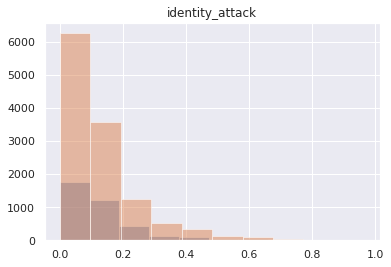

In [15]:
hists(gossipcop,features)

## Failure Analysis

Some entries have -1 as their score, indicating a possible failure (empty text, text too long, etc)

In [25]:
politifact["publish_date"]

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
956    1.516281e+09
957    1.352686e+09
958    1.508206e+09
959             NaN
960    1.521169e+09
Name: publish_date, Length: 961, dtype: float64

In [26]:
politifact.columns

Index(['url', 'text', 'images', 'top_img', 'keywords', 'authors',
       'canonical_link', 'title', 'meta_data', 'movies', 'publish_date',
       'source', 'summary', 'label', 'dataset', 'toxicity', 'severe_toxicity',
       'insult', 'profanity', 'threat', 'inflammatory', 'identity_attack'],
      dtype='object')

In [35]:
def utf8len(s):
    return len(s.encode('utf-8'))/1000

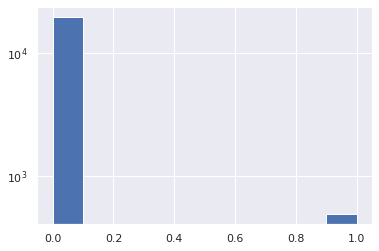

In [40]:
gossipcop["text"].apply(lambda x: int(utf8len(str(x)) > 20)).hist(log=True)

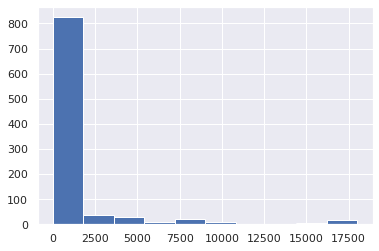

In [31]:
politifact["text"].apply(lambda x: str(x).split()).apply(len).hist()

In [22]:
politifact[politifact["toxicity"] == -1][~politifact[politifact["toxicity"] == -1]["text"].isna()]

,url,text,images,top_img,keywords,authors,canonical_link,title,meta_data,movies,...,summary,label,dataset,toxicity,severe_toxicity,insult,profanity,threat,inflammatory,identity_attack
5,https://apnews.com/c810d7de280a47e88848b0ac746...,A transcript of an Oval Office interview Frida...,['https://storage.googleapis.com/afs-prod/medi...,https://storage.googleapis.com/afs-prod/media/...,[],[],https://apnews.com/c810d7de280a47e88848b0ac746...,NaN,"{'viewport': 'width=device-width, initial-scal...",[],...,NaN,real,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,https://web.archive.org/web/20130401023352/htt...,"Written by Chris Wallace / Published March 31,...",['https://web.archive.org/web/20130401023352im...,https://web.archive.org/web/20130401023352im_/...,[],[],https://web.archive.org/web/20130401023352/htt...,Mark Kelly on whether call to action on gun co...,"{'dc.language': 'en-US', 'dc.publisher': 'Fox ...",[],...,NaN,real,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
16,https://www.washingtonpost.com/news/the-fix/wp...,Placeholder while article actions load\n\nThre...,['https://www.washingtonpost.com/wp-apps/imrs....,https://www.washingtonpost.com/wp-apps/imrs.ph...,[],[],https://www.washingtonpost.com/news/the-fix/wp...,"3rd Democratic debate transcript, annotated: W...","{'og': {'site_name': 'Washington Post', 'type'...",[],...,NaN,real,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
21,http://abcnews.go.com/ThisWeek/week-transcript...,"July 11, 2010  -- JAKE TAPPER, HOST: I know t...","['data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP...",http://abcnews.go.com/ThisWeek/week-transcript...,[],"['Abc News', 'January']",https://abcnews.go.com/ThisWeek/week-transcrip...,'This Week' Transcript: Biden,"{'description': ""Transcript of 'This Week' int...",[],...,NaN,real,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,http://transcripts.cnn.com/TRANSCRIPTS/1207/08...,\n\n\n\nReturn to Transcripts main page\n\nSta...,"['http://transcripts.cnn.com/assets/1.gif', 'h...",NaN,[],[],NaN,Transcripts,{},[],...,NaN,real,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,http://yournewswire.com/melania-trump-isis-bar...,Everygame 0.0 rating GET $750 IN BONUS FUNDS O...,['https://yournewswire.com/wp-content/uploads/...,https://yournewswire.com/wp-content/themes/joi...,[],[],NaN,yournewswire,"{'viewport': 'width=device-width, user-scalabl...",[],...,NaN,fake,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
950,https://web.archive.org/web/20170920104517/htt...,Johnny Depp made a big mistake when he threate...,['https://web.archive.org/web/20171209075503im...,https://web.archive.org/web/20171209075503im_/...,[],"['David Robinson', 'View All Posts David Robin...",https://web.archive.org/web/20171209075503/htt...,BREAKING: Johnny Depp Taken Into Custody By Se...,"{'generator': 'WordPress.com', 'og': {'type': ...",[],...,NaN,fake,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
952,daily-vine.com/cnn-pulls-plug/,People when going to sale their house then the...,['https://daily-vine.com/wp-content/uploads/20...,https://daily-vine.com/wp-content/uploads/2019...,[],[],NaN,"Daily Vine – Dubai, UAE","{'viewport': 'width=device-width, initial-scal...",[],...,NaN,fake,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
953,https://notallowedto.com/babysitter-on-drug-ea...,"9.6k SHARES Share Tweet Share\n\nDe Soto, Miss...",['https://notallowedto.com/wp-content/uploads/...,https://notallowedto.com/wp-content/uploads/20...,[],[],https://notallowedto.com/babysitter-on-drug-ea...,Babysitter on Crystal Meth Eats 3-Month-Old Baby,"{'viewport': 'width=device-width, initial-scal...",[],...,NaN,fake,politifact,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [23]:
gossipcop[gossipcop["toxicity"] == -1][~gossipcop[gossipcop["toxicity"] == -1]["text"].isna()]

,url,text,images,top_img,keywords,authors,canonical_link,title,meta_data,movies,...,summary,label,dataset,toxicity,severe_toxicity,insult,profanity,threat,inflammatory,identity_attack
0,https://www.dailymail.co.uk/tvshowbiz/article-...,Jennifer Lopez has been the subject of rumours...,['https://i.dailymail.co.uk/1s/2022/05/02/17/5...,https://i.dailymail.co.uk/1s/2018/12/01/13/688...,[],"['Marta Jary', 'Marta Jary For Daily Mail Aust...",https://www.dailymail.co.uk/tvshowbiz/article-...,Jennifer Lopez says she and boyfriend Alex Rod...,"{'keywords': 'dailymail,tvshowbiz', 'news_keyw...",[],...,NaN,real,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,https://www.dailymail.co.uk/news/article-53356...,Simone Biles cried as she spoke about pedophil...,['https://i.dailymail.co.uk/1s/2022/04/27/12/5...,https://i.dailymail.co.uk/i/pix/2018/01/31/16/...,[],"['Jennifer Smith', 'Jennifer Smith For Dailyma...",https://www.dailymail.co.uk/news/article-53356...,Simone Biles cries as she talks about Larry Na...,"{'keywords': 'dailymail,news,Team USA', 'news_...",[],...,NaN,real,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,https://people.com/music/kanye-west-41-birthda...,Kanye West celebrated his 41st birthday surrou...,['https://imagesvc.meredithcorp.io/v3/mm/image...,https://imagesvc.meredithcorp.io/v3/mm/image?q...,[],"['Maria Pasquini', 'June']",https://people.com/music/kanye-west-41-birthda...,"Kanye Cookies, Magic Tricks & KarJenners: Insi...","{'viewport': 'width=device-width,initial-scale...",[],...,NaN,real,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,https://www.flare.com/bachelor/bachelor-winter...,Does it look corny AF? Yup. Are we going to wa...,['https://www.flare.com/wp-content/themes/flar...,https://www.flare.com/wp-content/uploads/2018/...,[],['Lindsay Pinter'],https://www.flare.com/bachelor/bachelor-winter...,Everything We Know About 'The Bachelor Winter ...,"{'viewport': 'width=device-width, initial-scal...",['https://www.youtube.com/embed/rWvTRMi657o'],...,NaN,real,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,https://en.wikipedia.org/wiki/Raven%27s_Home,American television series\n\nRaven's Home is ...,['https://en.wikipedia.org/static/images/foote...,https://upload.wikimedia.org/wikipedia/en/1/18...,[],[],https://en.wikipedia.org/wiki/Raven%27s_Home,Raven's Home,"{'generator': 'MediaWiki 1.39.0-wmf.9', 'refer...",[],...,NaN,real,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,www.imdb.com/news/ni61471874,"IMDb.com, Inc. takes no responsibility for the...",['http://fls-na.amazon.com/1/batch/1/OP/A1EVAM...,https://m.media-amazon.com/images/G/01/imdb/im...,[],['Holly Nicol'],https://www.imdb.com/news/ni61471874,Danny Moder Told Richard Gere To Stay Away Fro...,{'og': {'url': 'http://www.imdb.com/news/ni614...,[],...,NaN,fake,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20085,www.thedailybeast.com/is-taylor-swift-kicking-...,"Taylor Swift, a woman who once allegedly used ...",['https://img.thedailybeast.com/image/upload/c...,https://img.thedailybeast.com/image/upload/c_c...,[],"['Amy Zimmerman', 'Entertainment Reporter']",https://www.thedailybeast.com/is-taylor-swift-...,Is Taylor Swift Kicking Kanye and Kim While Th...,"{'viewport': 'width=device-width, initial-scal...",[],...,NaN,fake,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20086,https://web.archive.org/web/20171107225820/htt...,"Earlier this year, the buzz around Megyn Kelly...",['https://web.archive.org/web/20171107225820im...,https://web.archive.org/web/20171107225820im_/...,[],['Madeline Berg'],https://web.archive.org/web/20171107225820/htt...,Why Megyn Kelly Didn't Make The List Of Highes...,"{'viewport': 'width=device-width,initial-scale...",[],...,NaN,fake,gossipcop,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20087,people.com/movies/kate-hudson-brad-pitt-dating...,Each product we feature has been independently...,['https://imagesvc.meredithcorp.io/v3/mm/image...,https://imag